In [1]:
import pandas as pd
import numpy as np

In [5]:
co2_data = pd.read_csv("C:/Users/Mahisa Ayu S/Downloads/DataCO2.csv").head(8)
co2_data

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92


### **1. Download DataCO2.csv, lakukan eksplorasi data dan preprocessing yang menurut andadiperlukan.**

In [12]:
# Cek Tipe Data dari Masing-Masing Kolom

co2_data.dtypes

Nama      object
Model     object
Volume     int64
Bobot      int64
CO2        int64
dtype: object

In [13]:
# Cek Missing Value Tiap Kolom

co2_data.isnull().sum()

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [14]:
# Cek Data Duplikat

co2_data.duplicated().sum()

0

In [18]:
# Mencari Info dari Tiap Kolom

co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    8 non-null      object
 1   Model   8 non-null      object
 2   Volume  8 non-null      int64 
 3   Bobot   8 non-null      int64 
 4   CO2     8 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 452.0+ bytes


In [19]:
# Statistika Deskriptif dari Kolom Numerik

co2_data.describe().round()

,Volume,Bobot,CO2
count,8.0,8.0,8.0
mean,1188.0,1036.0,96.0
std,247.0,190.0,6.0
min,900.0,790.0,90.0
25%,1000.0,913.0,92.0
50%,1100.0,1019.0,95.0
75%,1425.0,1145.0,100.0
max,1500.0,1365.0,105.0


**Interprestasi :**
    
- Tidak ada data yang memiliki missing value dan duplicate value, serta tipe data juga sudah sesuai dengan kolom masing-masing.

### **2. Apakah ada tipe data non numerik pada DataCO2.csv? Dan apakah ada yang bersifat nominal/ordinal? Jika ada sebutkan kolom mana saja, jika tidak jelaskan mengapa.**

- Tidak ada kolom yang bersifat ordinal. Kolom bertipe ordinal biasanya menunjukkan kategori yang memiliki tingkatan atau urutan tertentu, seperti ukuran (kecil, sedang, besar) atau tingkatan tertentu objek.
- Terdapat dua kolom yang bertipe data non-numerik, yaitu :
    - Nama : Tipe data object, yang biasanya digunakan untuk data berupa teks atau string.
    - Model : Tipe data object, yang juga berfungsi sebagai penyimpan data teks atau string.
    > Kedua kolom ini bersifat nominal karena hanya menyatakan kategori (nama atau tipe model) tanpa adanya urutan atau peringkat tertentu. Sementara itu, kolom Volume, Bobot, dan CO2 memiliki tipe data int64, yang berarti mereka berisi data numerik, bukan kategori, dan umumnya bersifat kuantitatif.

### **3. Buatlah model regresi menggunakan metode yang paling tepat menurut anda.**

In [1]:
# Regresi Linear Multivariable

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
X = np.array([co2_data["Volume"], co2_data["Bobot"]]).T
y = np.array(co2_data["CO2"])

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Membuat model regresi linear

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Prediksi pada data uji

y_pred_test = model.predict(X_test)

In [26]:
# Evaluasi model

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [27]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 93.48040866435217
RMSE: 9.668526705985363
MAE: 8.964495514037239
R-squared: -2.7392163465740866


In [30]:
# Menampilkan koefisien dan intercept

print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [ 0.03154196 -0.03924058]
Intercept: 97.32612898586248


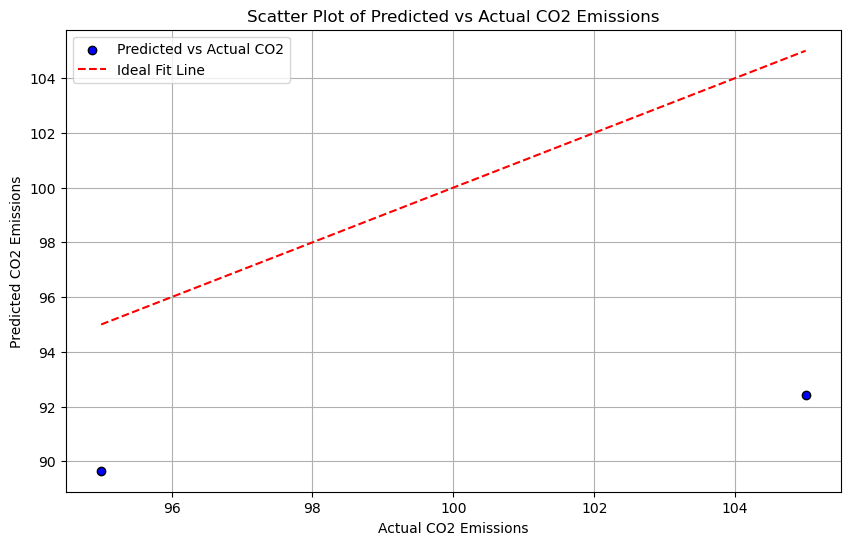

In [31]:
# Visualisasi

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolor='k', label="Predicted vs Actual CO2")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit Line")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Scatter Plot of Predicted vs Actual CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()

### **Mencoba Bangun model regresi non linear terhadap data CO2 dengan fungsi sigmoid dan fungsi cubic**

In [32]:
X = co2_data[['Volume', 'Bobot']].values
y = co2_data['CO2'].values

In [33]:
# Membagi data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Menggunakan Volume dan Bobot secara terpisah untuk fungsi sigmoid dan cubic

volume_train = X_train[:, 0]
bobot_train = X_train[:, 1]
volume_test = X_test[:, 0]
bobot_test = X_test[:, 1]

In [35]:
# Fungsi Sigmoid

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

In [36]:
# Fungsi Cubic

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [39]:
# Regresi dengan fungsi sigmoid pada Volume

from scipy.optimize import curve_fit

popt_sigmoid, _ = curve_fit(sigmoid, volume_train, y_train, maxfev=10000)
y_pred_sigmoid = sigmoid(volume_test, *popt_sigmoid)

In [40]:
# Regresi dengan fungsi cubic pada Volume

popt_cubic, _ = curve_fit(cubic, volume_train, y_train)
y_pred_cubic = cubic(volume_test, *popt_cubic)

In [41]:
# Evaluasi model sigmoid

mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(mse_sigmoid)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

In [42]:
# Evaluasi model cubic

mse_cubic = mean_squared_error(y_test, y_pred_cubic)
rmse_cubic = np.sqrt(mse_cubic)
mae_cubic = mean_absolute_error(y_test, y_pred_cubic)
r2_cubic = r2_score(y_test, y_pred_cubic)

Sigmoid Model Evaluation :
MSE : 48.361111109147345
RMSE : 6.954215348200496
MAE : 5.0
R-squared : -0.9344444443658937




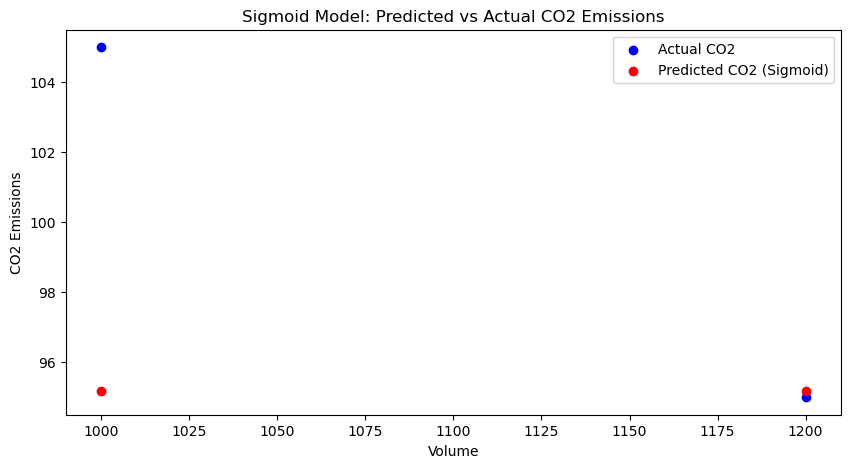

In [44]:
# Menampilkan hasil evaluasi Sigmoid

print("Sigmoid Model Evaluation :")
print("MSE :", mse_sigmoid)
print("RMSE :", rmse_sigmoid)
print("MAE :", mae_sigmoid)
print("R-squared :", r2_sigmoid)
print("\n")

# Plotting Sigmoid Model

plt.figure(figsize=(10, 5))
plt.scatter(volume_test, y_test, color='blue', label="Actual CO2")
plt.scatter(volume_test, y_pred_sigmoid, color='red', label="Predicted CO2 (Sigmoid)")
plt.xlabel("Volume")
plt.ylabel("CO2 Emissions")
plt.title("Sigmoid Model: Predicted vs Actual CO2 Emissions")
plt.legend()
plt.show()

Cubic Model Evaluation :
MSE : 34.205000006928195
RMSE : 5.84850408283419
MAE : 5.050000000637851
R-squared : -0.36820000027712774




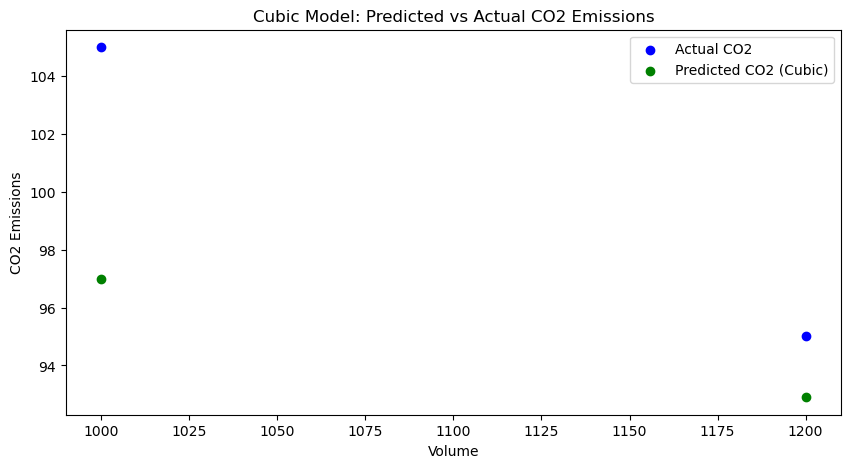

In [45]:
# Menampilkan hasil evaluasi Cubic

print("Cubic Model Evaluation :")
print("MSE :", mse_cubic)
print("RMSE :", rmse_cubic)
print("MAE :", mae_cubic)
print("R-squared :", r2_cubic)
print("\n")

# Plotting Cubic Model

plt.figure(figsize=(10, 5))
plt.scatter(volume_test, y_test, color='blue', label="Actual CO2")
plt.scatter(volume_test, y_pred_cubic, color='green', label="Predicted CO2 (Cubic)")
plt.xlabel("Volume")
plt.ylabel("CO2 Emissions")
plt.title("Cubic Model: Predicted vs Actual CO2 Emissions")
plt.legend()
plt.show()

### **Kesimpulan model regresi mana yang paling tepat untuk memodelkan data CO2 dengan metode regresi.**

C:\Users\Mahisa Ayu S\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Linear Regression (single variable):
MSE: 58.63038552929685, RMSE: 7.657048095010038, MAE: 5.459227467811161, R-squared: -1.3452154211718739

Multivariable Linear Regression:
MSE: 93.48040866435217, RMSE: 9.668526705985363, MAE: 8.964495514037239, R-squared: -2.7392163465740866

Sigmoid Regression:
MSE: 48.361111109147345, RMSE: 6.954215348200496, MAE: 5.0, R-squared: -0.9344444443658937

Cubic Regression:
MSE: 34.205000006928195, RMSE: 5.84850408283419, MAE: 5.050000000637851, R-squared: -0.36820000027712774



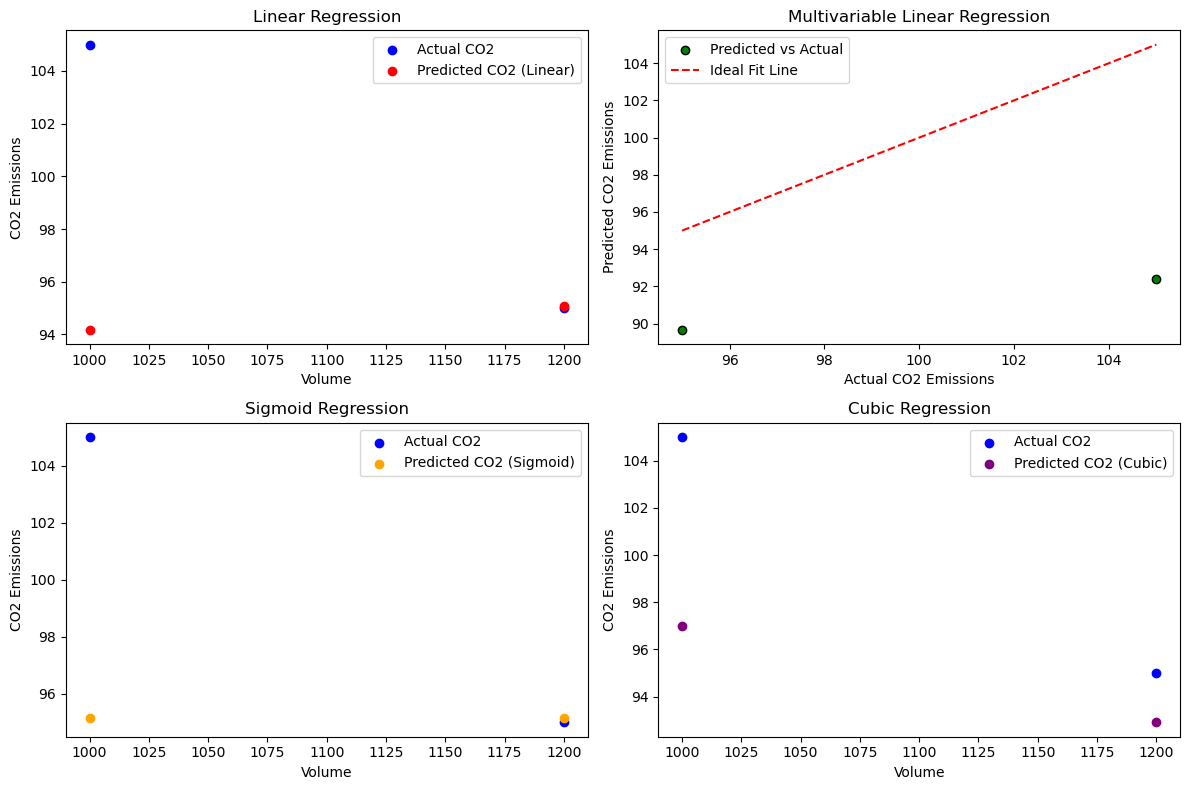

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import curve_fit

X = co2_data[['Volume', 'Bobot']].values
y = co2_data['CO2'].values

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi evaluasi model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Model 1: Regresi Linear (menggunakan hanya Volume sebagai prediktor)
model_linear = LinearRegression()
model_linear.fit(X_train[:, 0].reshape(-1, 1), y_train)
y_pred_linear = model_linear.predict(X_test[:, 0].reshape(-1, 1))
mse_linear, rmse_linear, mae_linear, r2_linear = evaluate_model(y_test, y_pred_linear)

# Model 2: Regresi Linear Multivariable (menggunakan Volume dan Bobot)
model_multivariable = LinearRegression()
model_multivariable.fit(X_train, y_train)
y_pred_multivariable = model_multivariable.predict(X_test)
mse_multivariable, rmse_multivariable, mae_multivariable, r2_multivariable = evaluate_model(y_test, y_pred_multivariable)

# Model 3: Regresi Sigmoid
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

popt_sigmoid, _ = curve_fit(sigmoid, X_train[:, 0], y_train, maxfev=10000)
y_pred_sigmoid = sigmoid(X_test[:, 0], *popt_sigmoid)
mse_sigmoid, rmse_sigmoid, mae_sigmoid, r2_sigmoid = evaluate_model(y_test, y_pred_sigmoid)

# Model 4: Regresi Cubic
def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt_cubic, _ = curve_fit(cubic, X_train[:, 0], y_train)
y_pred_cubic = cubic(X_test[:, 0], *popt_cubic)
mse_cubic, rmse_cubic, mae_cubic, r2_cubic = evaluate_model(y_test, y_pred_cubic)

# Menampilkan hasil evaluasi
print("Linear Regression (single variable):")
print(f"MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R-squared: {r2_linear}\n")

print("Multivariable Linear Regression:")
print(f"MSE: {mse_multivariable}, RMSE: {rmse_multivariable}, MAE: {mae_multivariable}, R-squared: {r2_multivariable}\n")

print("Sigmoid Regression:")
print(f"MSE: {mse_sigmoid}, RMSE: {rmse_sigmoid}, MAE: {mae_sigmoid}, R-squared: {r2_sigmoid}\n")

print("Cubic Regression:")
print(f"MSE: {mse_cubic}, RMSE: {rmse_cubic}, MAE: {mae_cubic}, R-squared: {r2_cubic}\n")

# Plotting Hasil Prediksi vs Nilai Aktual
plt.figure(figsize=(12, 8))

# Plot untuk regresi linear
plt.subplot(2, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual CO2")
plt.scatter(X_test[:, 0], y_pred_linear, color='red', label="Predicted CO2 (Linear)")
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("CO2 Emissions")
plt.legend()

# Plot untuk regresi multivariable
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_multivariable, color='green', edgecolor='k', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit Line")
plt.title("Multivariable Linear Regression")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.legend()

# Plot untuk regresi sigmoid
plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual CO2")
plt.scatter(X_test[:, 0], y_pred_sigmoid, color='orange', label="Predicted CO2 (Sigmoid)")
plt.title("Sigmoid Regression")
plt.xlabel("Volume")
plt.ylabel("CO2 Emissions")
plt.legend()

# Plot untuk regresi cubic
plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual CO2")
plt.scatter(X_test[:, 0], y_pred_cubic, color='purple', label="Predicted CO2 (Cubic)")
plt.title("Cubic Regression")
plt.xlabel("Volume")
plt.ylabel("CO2 Emissions")
plt.legend()

plt.tight_layout()
plt.show()

#### **Berdasarkan hasil metrik evaluasi di atas, berikut analisis untuk menentukan model regresi yang paling tepat untuk memprediksi data CO2 :**

- Linear Regression (Single Variable) :
    - MSE: 58.63, RMSE: 7.66, MAE: 5.46, R-squared: -1.35
    - Model ini memiliki R-squared negatif, yang menunjukkan bahwa model ini tidak cocok untuk memprediksi CO2 menggunakan Volume saja.
- Multivariable Linear Regression :
    - MSE: 93.48, RMSE: 9.67, MAE: 8.96, R-squared: -2.74
    - Model ini bahkan lebih buruk daripada regresi linear dengan satu variabel, dengan R-squared sangat negatif, menunjukkan bahwa menambahkan Bobot sebagai variabel tambahan tidak meningkatkan akurasi.
- Sigmoid Regression :
    - MSE: 48.36, RMSE: 6.95, MAE: 5.0, R-squared: -0.93
    - Model sigmoid memiliki MSE dan RMSE lebih kecil dibandingkan model linear, dan menunjukkan sedikit perbaikan dalam memprediksi CO2 dibandingkan regresi linear.
- Cubic Regression :
    - MSE: 34.21, RMSE: 5.85, MAE: 5.05, R-squared: -0.37
    - Model cubic memberikan hasil terbaik dari semua metrik, dengan MSE, RMSE, dan MAE terendah, serta R-squared yang paling mendekati 0 di antara semua model yang ada. Meskipun nilai R-squared masih negatif, hal ini menandakan model cubic adalah yang paling cocok untuk menangkap pola dalam data CO2 dibandingkan model lain.

> Kesimpulan :
- Dari hasil di atas, model cubic merupakan model regresi paling tepat untuk memprediksi CO2 karena memiliki MSE, RMSE, dan MAE yang paling rendah. Hal ini menunjukkan bahwa model cubic lebih mampu menangkap pola data non-linear yang ada dalam dataset CO2, meskipun dataset ini kecil dan menunjukkan pola yang tidak linier.

## **🪷🫧🧜🏻‍♀️🪸 TERIMA KASIH 🪷🫧🧜🏻‍♀️🪸**